In [5]:
# Import Packages

import pandas as pd
import numpy as np
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings 
warnings.filterwarnings("ignore")

# Encoding Packages

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
# Reading the file 2015 to 2016

df_1 = pd.read_csv(r"D:\DS PROJECTS\Singapore  Resale Flat Prices Predicting\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [3]:
# Reading the file 2017 onwards
            
df_2 = pd.read_csv(r"ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
# Concadinating the df_1 and df_2

df_3 = pd.concat([df_1,df_2], axis=0)
df_3.reset_index(drop=True,inplace=True)
df_3.tail()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
218939,2024-06,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,146.0,Maisonette,1988,63 years 03 months,800000.0
218940,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,63 years 01 month,850000.0
218941,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,61 years,790000.0
218942,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0
218943,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,62 years 08 months,1000000.0


In [5]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218944 entries, 0 to 218943
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                218944 non-null  object 
 1   town                 218944 non-null  object 
 2   flat_type            218944 non-null  object 
 3   block                218944 non-null  object 
 4   street_name          218944 non-null  object 
 5   storey_range         218944 non-null  object 
 6   floor_area_sqm       218944 non-null  float64
 7   flat_model           218944 non-null  object 
 8   lease_commence_date  218944 non-null  int64  
 9   remaining_lease      218944 non-null  object 
 10  resale_price         218944 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.4+ MB


In [6]:
df_3.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [7]:
# Change the column name

df_3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [8]:
# Creating a new column "address"

df_3["address"] = df_3["block"]+" "+df_3["street_name"]

In [9]:
# Droping the column in "street_name" and "block"

df_4 = df_3.drop(columns=["block","street_name"])

In [10]:
df_4.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10


In [11]:
# Data type Convert

df_4["month"] = pd.to_datetime(df_4["month"], format="%Y-%m")

In [12]:
# Splitting the month column to "year" and "month"

df_4["year"] = df_4["month"].dt.year

df_4["month"] = df_4["month"].dt.month

In [13]:
df_4.head(3)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015
2,1,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4,2015


In [14]:
df_4["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [15]:
df_4["town"].nunique()

26

In [16]:
df_4["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [17]:
df_4["flat_model"].nunique()

21

In [18]:
df_4["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [19]:
df_4["flat_type"].nunique()

7

In [20]:
# Choosing the "LabelEncoder" for "town", "OrdinalEncoder" for the "flat_model" and flat_type

df_4["town"] = LabelEncoder().fit_transform(df_4["town"])

df_4["flat_model"] = OrdinalEncoder().fit_transform(df_4[["flat_model"]])

df_4["flat_type"] = OrdinalEncoder().fit_transform(df_4[["flat_type"]])

In [21]:
df_4["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [22]:
df_4["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [23]:
df_4["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [24]:
df_4.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,2.0,07 TO 09,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,0,2.0,01 TO 03,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [25]:
df_4[["storey_start", "storey_end"]] = df_4["storey_range"].str.split("TO", expand=True)


In [26]:
# Droping the "storey_range" column

df_4.drop(columns=["storey_range"], inplace=True)

In [28]:
df_4.head(3)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03
2,1,0,2.0,69.0,12.0,1980,64,285000.0,163 ANG MO KIO AVE 4,2015,01,03


In [29]:
df_4["address"].nunique()

9591

In [31]:
# Address have 9591 unique values in the 218944, so i Encode it for the correlation checking
# I chooshing the "Label Encoder" for the "address" column

df_4["address"] = LabelEncoder().fit_transform(df_4["address"])

In [32]:
# Convert Data Type "storey_start" and "storey_end"

df_4["storey_start"] = df_4["storey_start"].astype(int)

df_4["storey_end"] = df_4["storey_end"].astype(int)


In [ ]:
# Spliting the "remaining_lease" column in "remaining_lease_month" and "remaining_lease_year"

slice_values = []
for i in df_4["remaining_lease"].astype(str):
    j = i.replace("years","")
    k = j.replace("months","")
    l = k.replace("month","")
    m = l.strip()
    n = m.split("  ")
    slice_values.append(n)
    #print(n)

In [77]:
df_data = pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])


In [81]:
# Data Type Convert "remaining_lease_year" and "remaining_lease_month"

df_data["remaining_lease_year"] = df_data["remaining_lease_year"].astype(int)

df_data["remaining_lease_month"] = df_data["remaining_lease_month"].fillna(0).astype(int)

In [82]:
# Droping the "remaining_lease" column

df_4.drop(columns=["remaining_lease"], inplace=True)

In [83]:
# Concadinating the DataFrames in "df_data" and "df_4"

df_5 = pd.concat([df_4,df_data], axis=1)

In [85]:
df_5.head(3)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
0,1,0,2.0,60.0,5.0,1986,255000.0,1635,2015,7,9,70,0
1,1,0,2.0,68.0,12.0,1981,275000.0,6596,2015,1,3,65,0
2,1,0,2.0,69.0,12.0,1980,285000.0,1466,2015,1,3,64,0


In [86]:
df_5.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [87]:
# Rearange the column

df_6 = df_5[['year','month','town','flat_type', 'floor_area_sqm', 'flat_model','address',
             'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
             'lease_commence_date', 'resale_price',]]

In [88]:
df_6.head(3)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1635,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6596,1,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1466,1,3,64,0,1980,285000.0


In [90]:
df_7 = df_6.sort_values(by = ["year", "month"])
df_7.head(3)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1635,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6596,1,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1466,1,3,64,0,1980,285000.0


In [91]:
# DataFrame save the "csv_file"

df_7.to_csv("Resale Flat Prices.csv", index= False)

In [17]:
df_final = pd.read_csv(r"D:\DS PROJECTS\Singapore  Resale Flat Prices Predicting\Resale Flat Prices.csv")
df_final.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1635,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6596,1,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1466,1,3,64,0,1980,285000.0
3,2015,1,0,2.0,68.0,12.0,5433,1,3,63,0,1979,290000.0
4,2015,1,0,2.0,68.0,12.0,6750,7,9,64,0,1980,290000.0


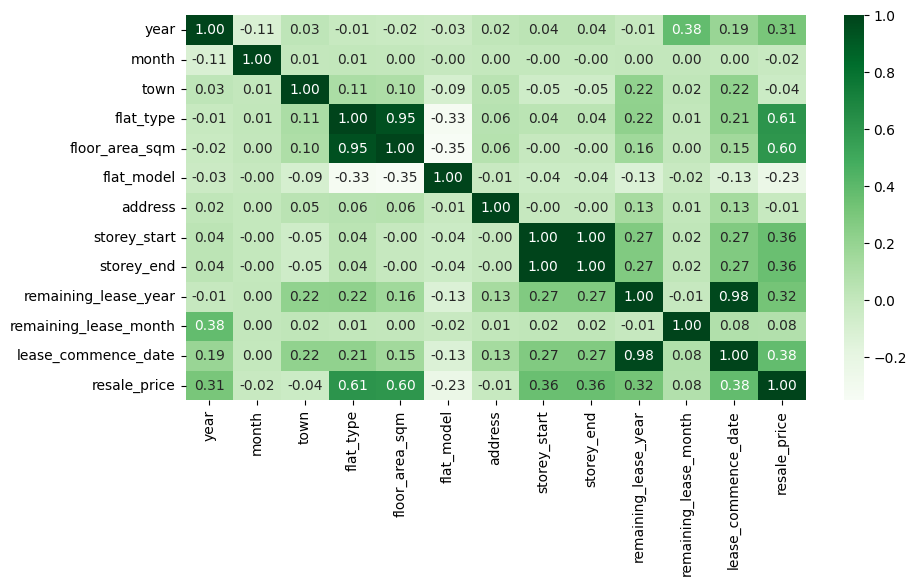

In [18]:
# Checking the Correlation using heatmap

df_final_corr = df_final.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_final_corr, annot=True, cmap="Greens", fmt="0.2f")
plt.show()

In [19]:
# Checking the duplicate values
df_final.duplicated().sum()

312

In [20]:
# Remove the duplicate values
df_final_1 = df_final.drop_duplicates()
df_final_1.reset_index(drop=True, inplace=True)


In [21]:
df_final_1.tail()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
218627,2024,6,25,5.0,146.0,7.0,4406,4,6,63,3,1988,800000.0
218628,2024,6,25,5.0,142.0,3.0,4080,4,6,63,1,1988,850000.0
218629,2024,6,25,5.0,146.0,7.0,8295,10,12,61,0,1986,790000.0
218630,2024,6,25,5.0,146.0,7.0,8882,10,12,62,8,1988,1000000.0
218631,2024,6,25,5.0,146.0,7.0,8882,4,6,62,8,1988,1000000.0


In [22]:
# The "month" and "address" column does have very lowest correlation with other features
# So I drop the "month" and "address" columns

df_final_2 = df_final_1.drop(columns=["month","address"])

In [8]:
df_final_2.head(3)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,0,2.0,60.0,5.0,7,9,70,0,1986,255000.0
1,2015,0,2.0,68.0,12.0,1,3,65,0,1981,275000.0
2,2015,0,2.0,69.0,12.0,1,3,64,0,1980,285000.0


In [23]:
# detecting the skewed columns and outliers data find using plot 

def plot(df,column):
    # distplot
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    plt.title("Distplot for"+" "+column)

    # histogram plot
    plt.subplot(1,3,2)
    sns.histplot(df, x=column, kde=True, bins=30, color="salmon")
    plt.title("Histogram plot for"+" "+column)

    # boxplot
    plt.subplot(1,3,3)
    
    sns.boxplot(df, x=column)
    plt.title("Box plot for"+" "+column)

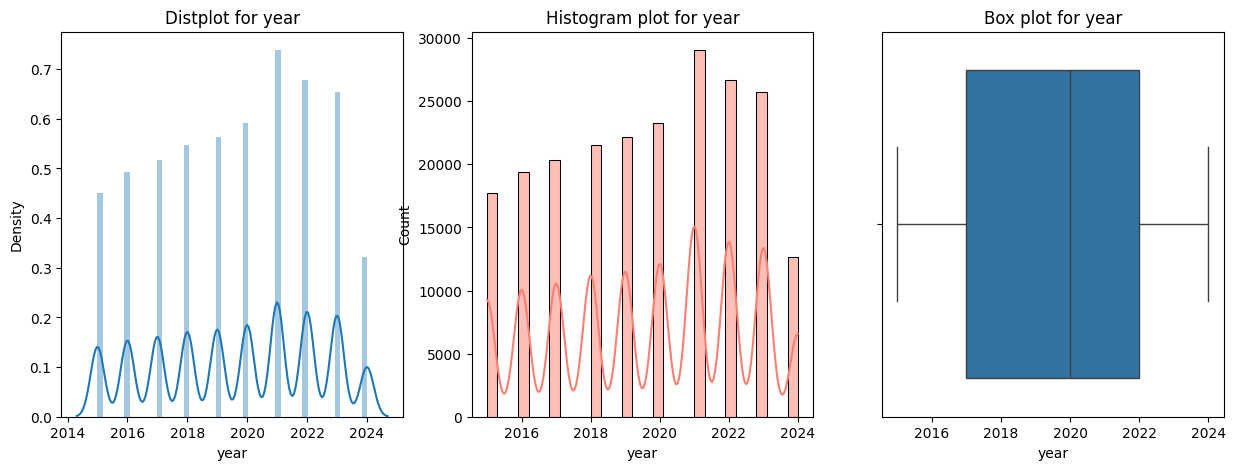

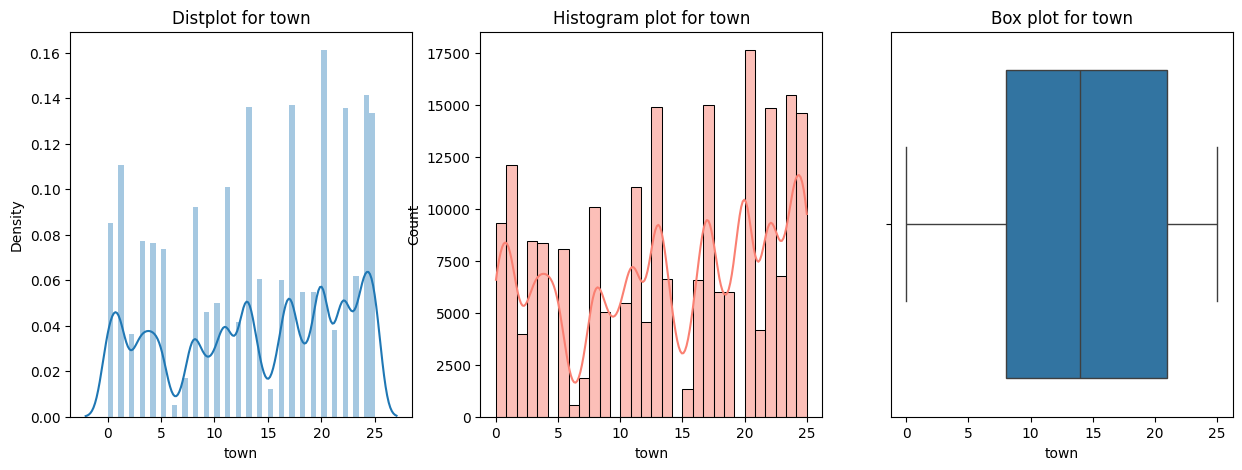

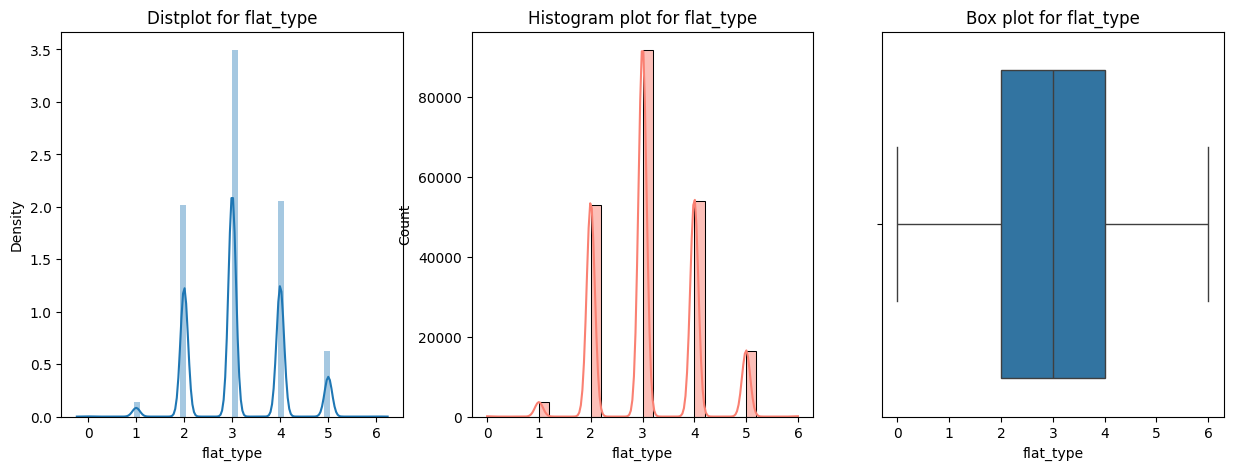

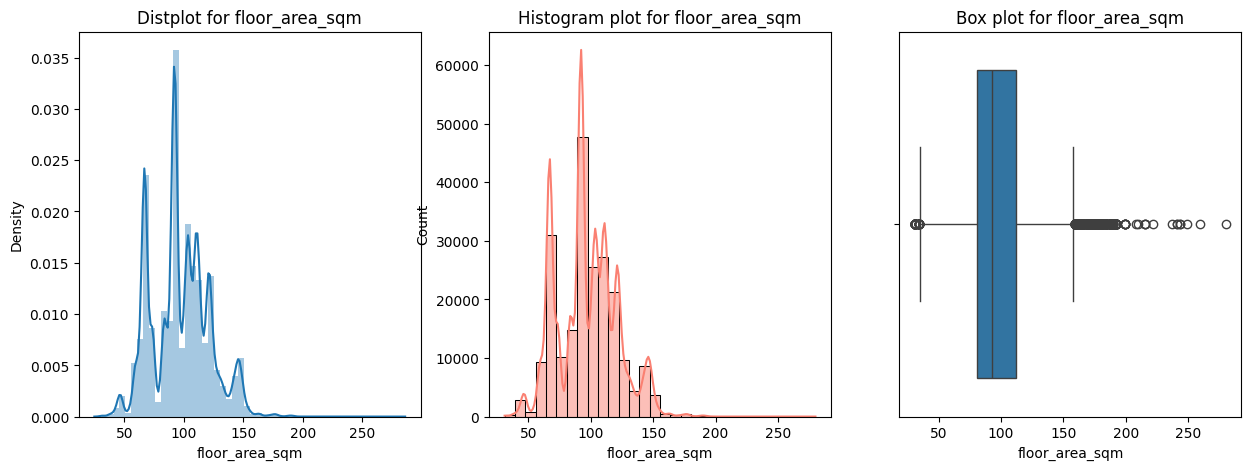

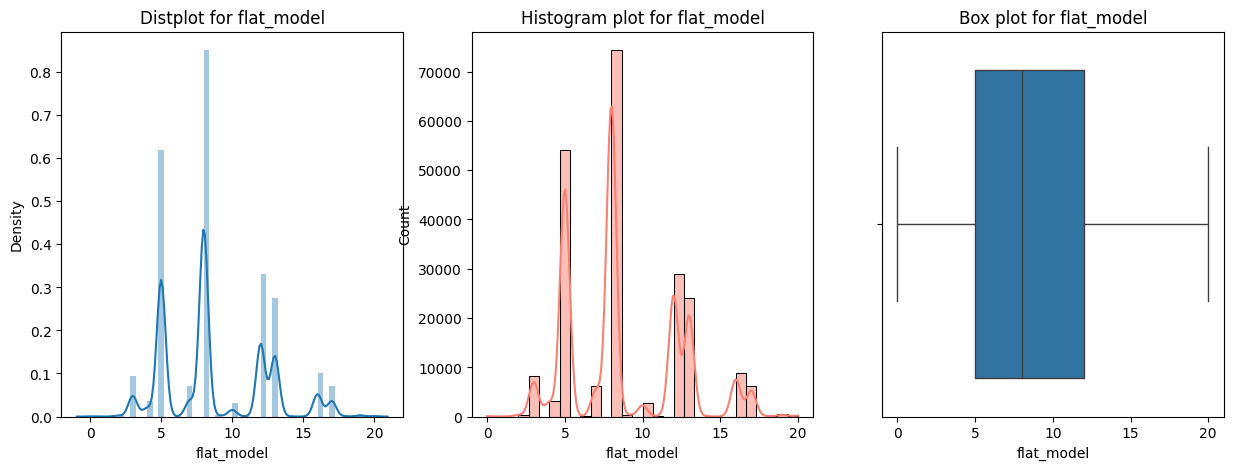

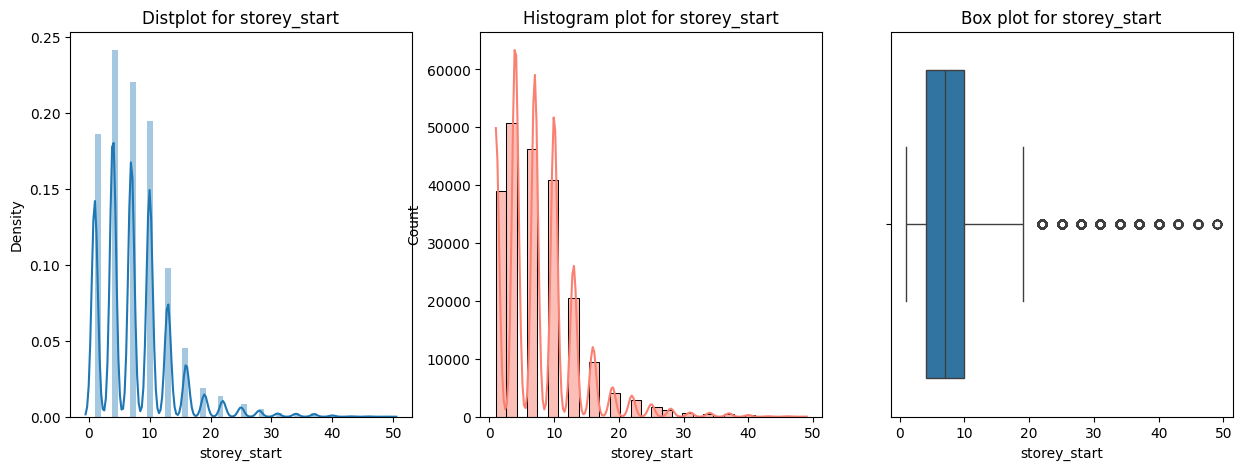

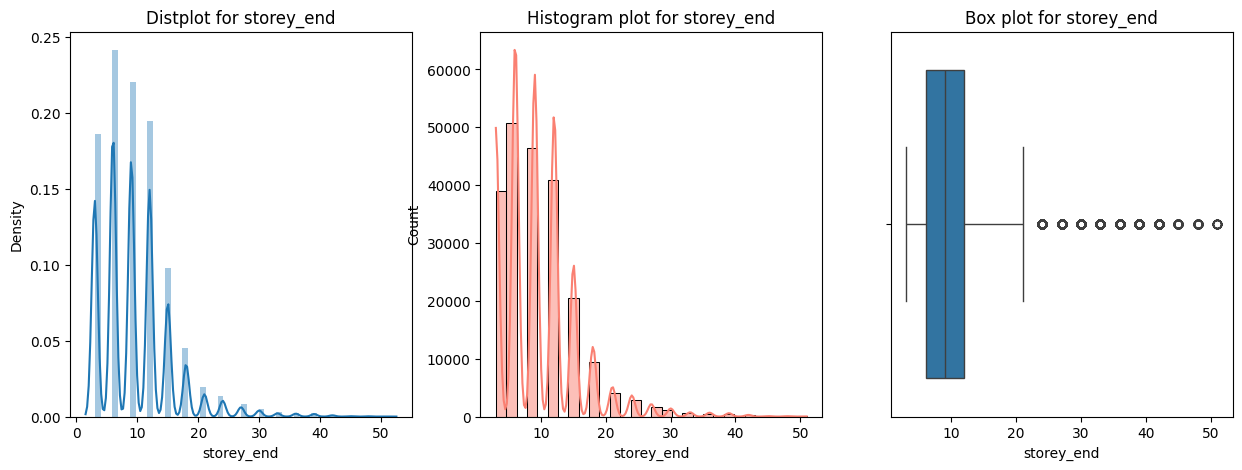

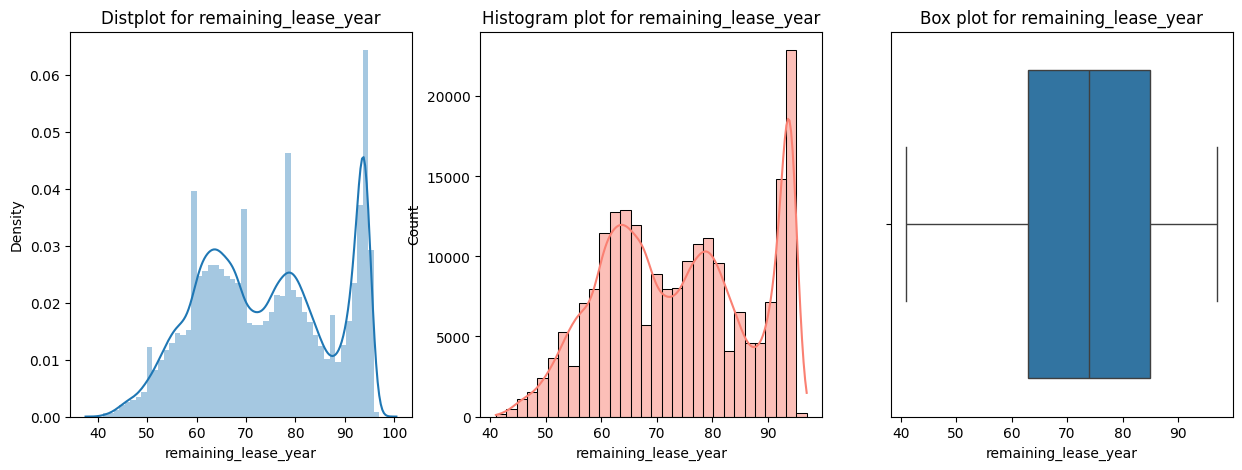

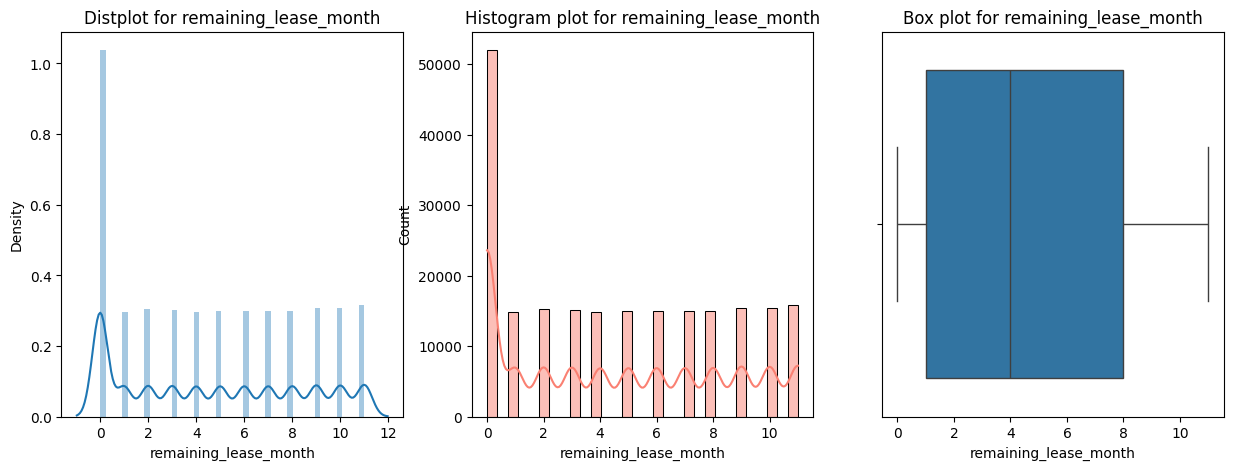

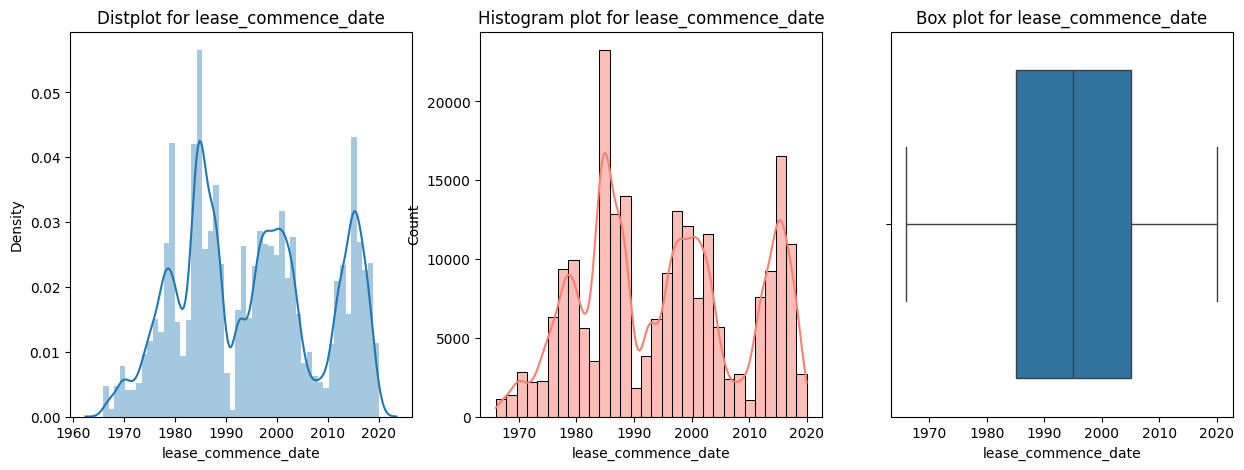

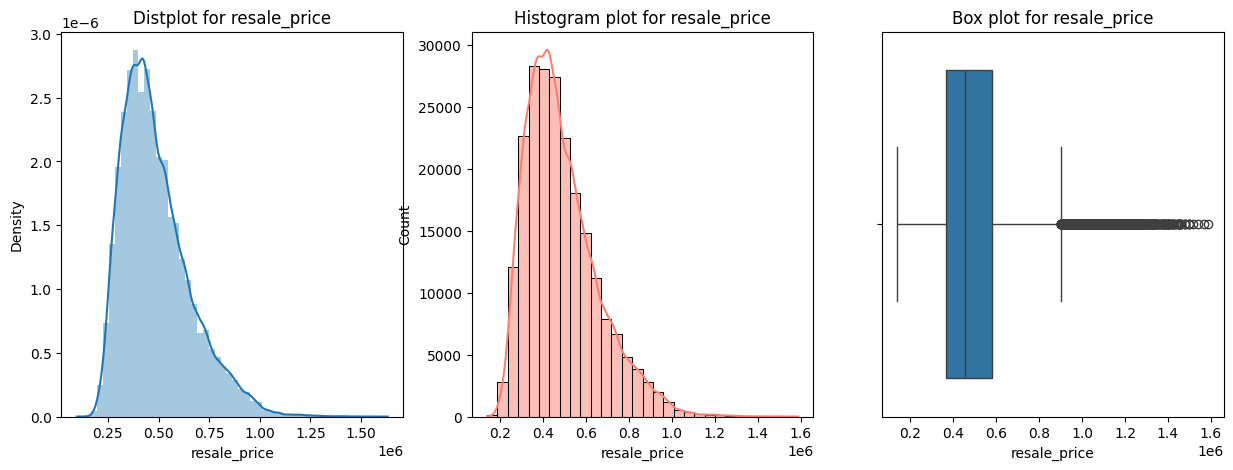

In [10]:
for i in df_final_2.columns:
    plot(df_final_2,i)

### Handling the skewness using (Log Transfermation)
Log transformation is reduce skewness in a distribution and make it more symmetric.
primarily used to convert a skewed distribution to a normal distribution.

In [24]:
df_final_3 = df_final_2.copy()

In [25]:
df_final_3.columns

Index(['year', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [ ]:
# The Skewness Columns
# 1. storey_start
# 2. storey_end
# 3. resale_price

In [26]:
df_final_3["storey_start"] = np.log(df_final_3["storey_start"])

df_final_3["storey_end"] = np.log(df_final_3["storey_end"])

df_final_3["resale_price"] = np.log(df_final_3["resale_price"])

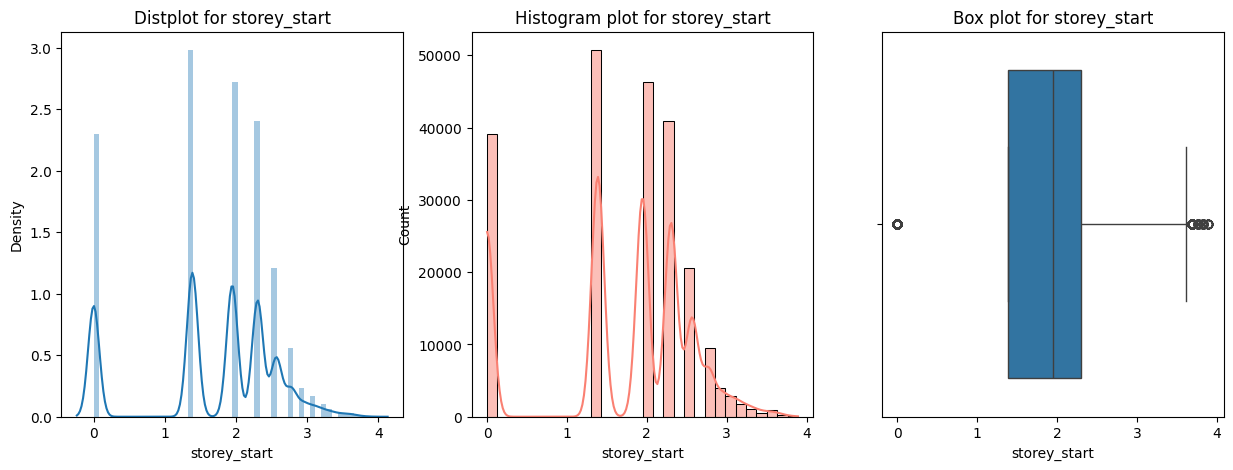

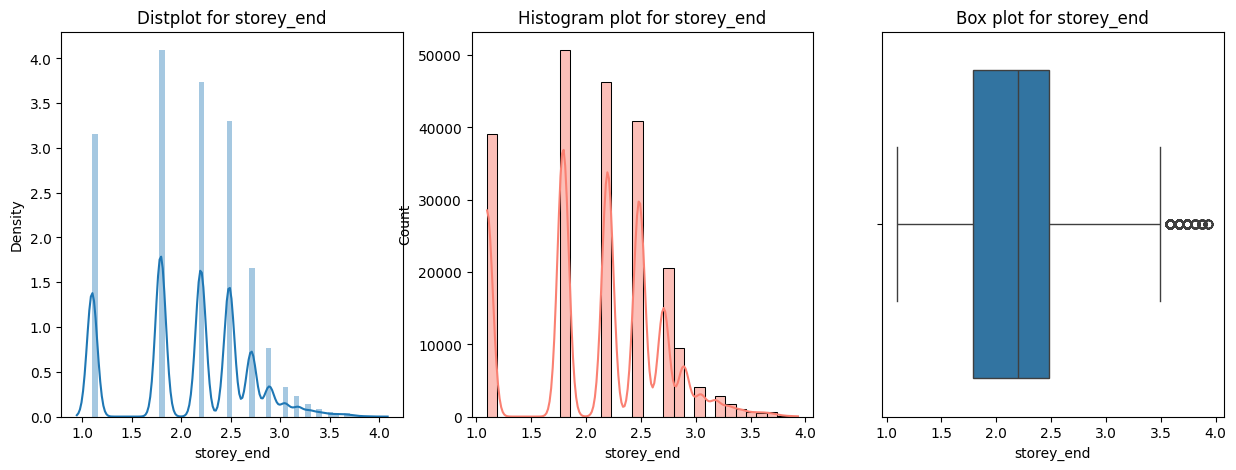

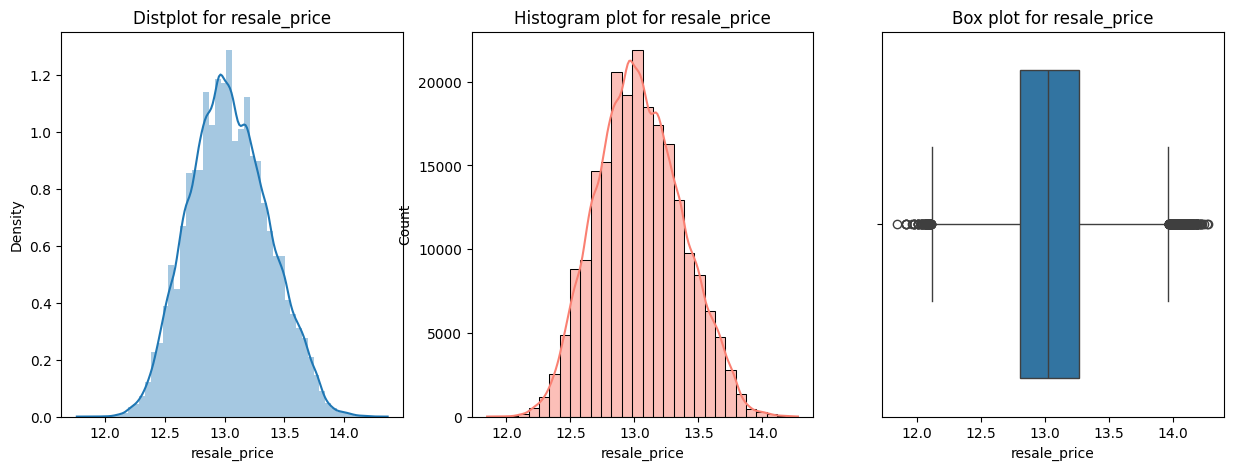

In [27]:
skewed_columns = ["storey_start", "storey_end", "resale_price"]

for i in skewed_columns:
    plot(df_final_3,i)

# Outliers Handling - Outlier Removal in Dataset using IQR -  Interquartile Range(IQR) Method Used

An outlier is a single data point that goes far outside the average value of a group.

In [28]:
df_final_4 = df_final_3.copy()

In [29]:
df_final_4.columns

Index(['year', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [ ]:
# The Outlier Columns are

# 1. floor_area_sqm
# 2. storey_start_log
# 3. storey_end_log
# 4. resale_price_log

In [ ]:
# The lower threshold is lower than the lowest input value 
# the upper threshold is greater than the highest input value

In [20]:
def outlier(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.72)

    iqr= q3-q1

    upper_threshold = q3 + (1.5*iqr)
    lower_threshold = q1 - (1.5*iqr)

    #The clip() function is a numpy method that is used to limit the values in an array.
    df[column] = df[column].clip(lower_threshold, upper_threshold)


In [21]:
outlier_columns = ["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)


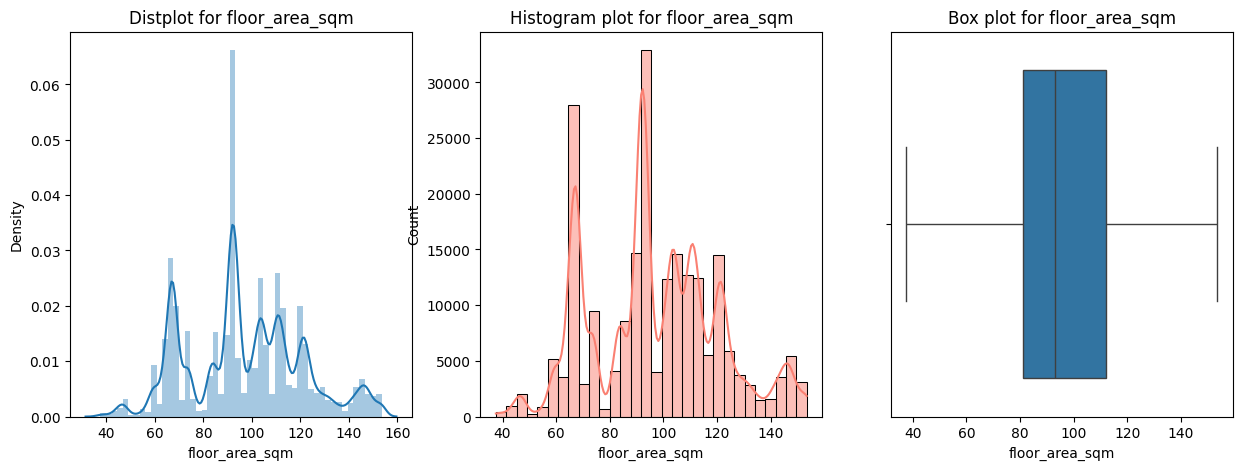

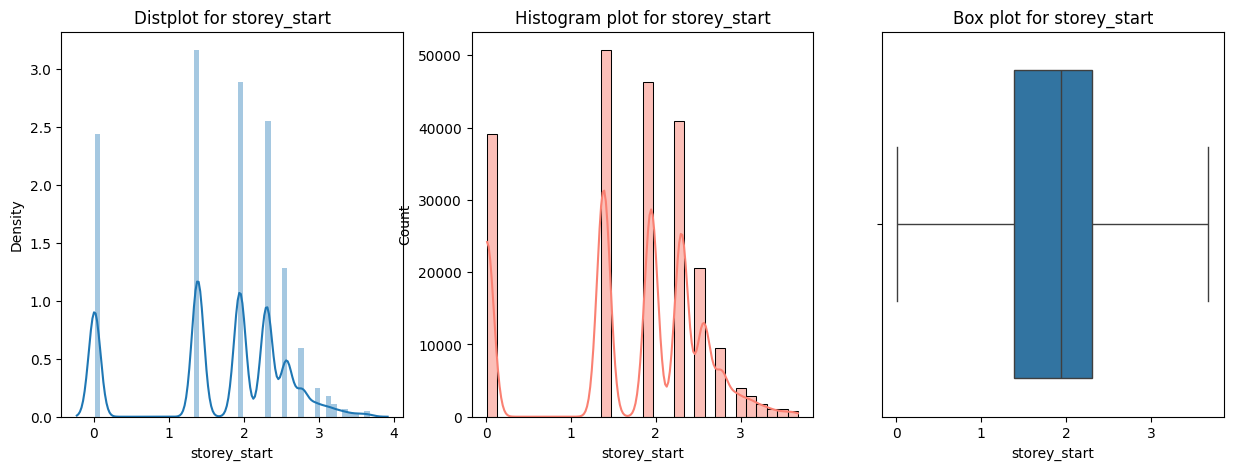

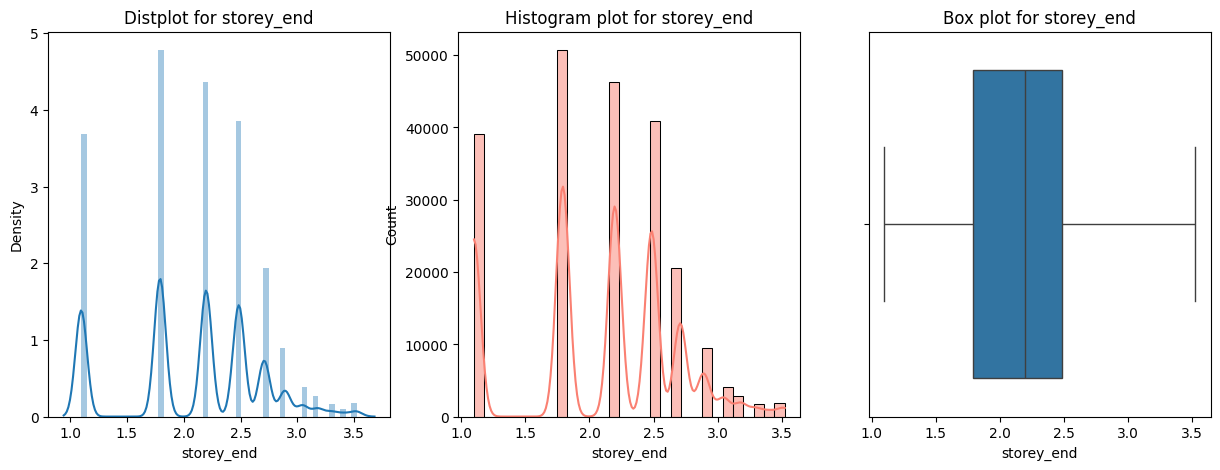

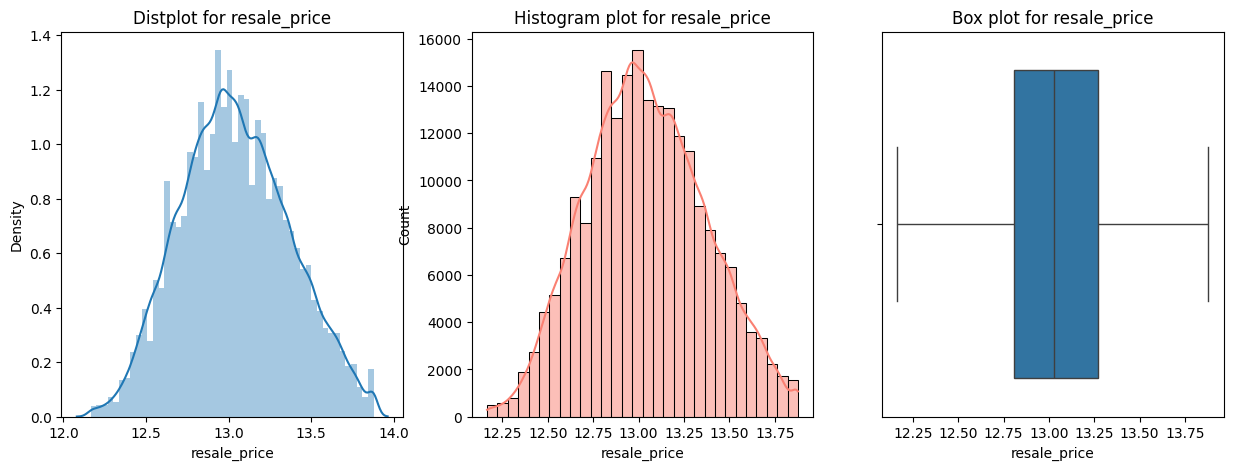

In [22]:
for k in outlier_columns:
    plot(df_final_4,k)

In [23]:
df_final_4.columns

Index(['year', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month', 'lease_commence_date', 'resale_price'],
      dtype='object')

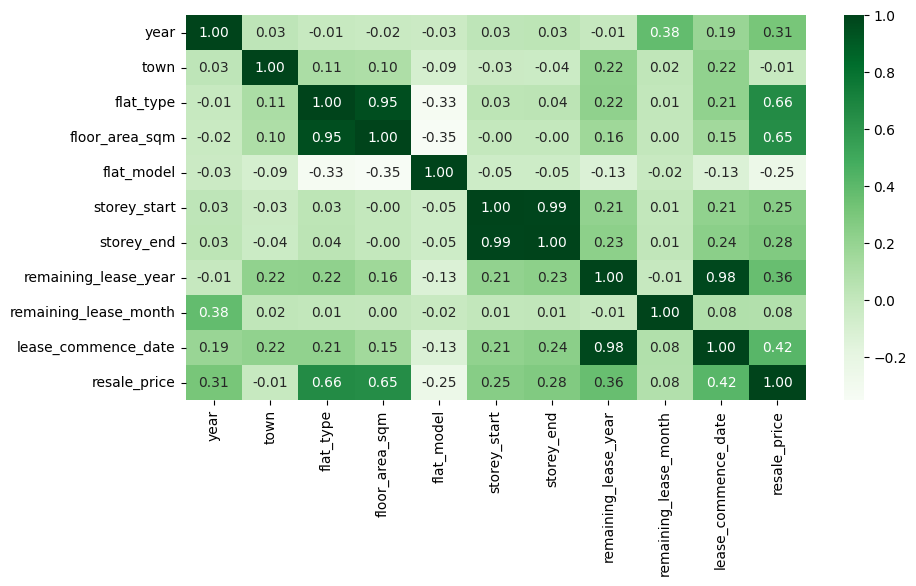

In [25]:
# Checking the correlation after the outlier cleard with proper data

plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot=True, cmap="Greens", fmt="0.2f")
plt.show()

In [26]:
# DataFrame Save the "Csv_file"
df_final_4.to_csv("Resale Flat Prices With Proper Data", index=False)

In [4]:
df_final_5 = pd.read_csv(r"D:\DS PROJECTS\Singapore  Resale Flat Prices Predicting\Resale Flat Prices With Proper Data")
df_final_5.tail()

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
218627,2024,25,5.0,146.0,7.0,1.386294,1.791759,63,3,1988,13.592367
218628,2024,25,5.0,142.0,3.0,1.386294,1.791759,63,1,1988,13.652992
218629,2024,25,5.0,146.0,7.0,2.302585,2.484907,61,0,1986,13.579788
218630,2024,25,5.0,146.0,7.0,2.302585,2.484907,62,8,1988,13.815511
218631,2024,25,5.0,146.0,7.0,1.386294,1.791759,62,8,1988,13.815511


In [5]:
df_final_6 = df_final_5.copy()

In [43]:
df_final_6.describe().T

,count,mean,std,min,25%,50%,75%,max
year,218632.0,2019.623340,2.691673,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,218632.0,13.892600,7.956172,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,218632.0,3.120591,0.919429,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,218632.0,97.027270,23.750110,37.500000,81.000000,93.000000,112.000000,153.500000
flat_model,218632.0,8.690132,3.645666,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,218632.0,1.695696,0.920773,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,218632.0,2.093425,0.601219,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,218632.0,74.093660,13.485874,41.000000,63.000000,74.000000,85.000000,97.000000
remaining_lease_month,218632.0,4.604033,3.781493,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,218632.0,1995.150934,13.690959,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000


In [45]:
np.exp(13.877751)

1064218.1967576945

In [46]:
# Checking how many datas are outliers based on "resale_price" (maximum value >), Filter method used.

df_final_1[df_final_1["resale_price"] > 1064218]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
15290,2015,11,7,4.0,107.0,20.0,1941,43,45,94,0,2011,1088000.0
18088,2016,1,7,4.0,108.0,20.0,1939,28,30,94,0,2011,1068888.0
25982,2016,6,7,4.0,107.0,20.0,1941,34,36,93,0,2011,1070000.0
29408,2016,8,7,4.0,105.0,20.0,1939,31,33,93,0,2011,1070000.0
29991,2016,8,14,4.0,119.0,4.0,8686,28,30,93,0,2011,1100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218273,2024,6,18,4.0,124.0,5.0,8854,19,21,72,5,1997,1260000.0
218380,2024,6,21,5.0,146.0,7.0,3969,4,6,60,11,1986,1080000.0
218486,2024,6,23,3.0,93.0,8.0,942,31,33,93,3,2018,1200000.0
218496,2024,6,23,4.0,114.0,4.0,1082,19,21,87,0,2012,1280000.0


In [48]:
np.exp(12.165593)

192065.7422588514

In [41]:
# Checking how many datas are outliers based on "resale_price" (minimum value <), Filter method used.

df_final_1[df_final_1["resale_price"] < 192065]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
36014,2016,12,4,1.0,35.0,17.0,1956,4,6,53,0,1971,192000.0
36910,2016,12,23,1.0,40.0,17.0,6771,1,3,49,0,1967,190000.0
47067,2017,7,4,0.0,31.0,5.0,8083,4,6,56,8,1975,175000.0
48310,2017,7,24,1.0,45.0,5.0,1415,7,9,66,4,1984,188000.0
48852,2017,8,4,0.0,31.0,5.0,8083,4,6,56,7,1975,190000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127297,2021,2,4,0.0,31.0,5.0,8083,4,6,53,1,1975,180000.0
129484,2021,3,4,0.0,31.0,5.0,8083,1,3,53,0,1975,190000.0
134203,2021,5,4,0.0,31.0,5.0,8083,1,3,52,10,1975,190000.0
197149,2023,8,22,2.0,67.0,8.0,6376,7,9,91,3,2015,150000.0


# Model Selection for "Regression"
# Now we want to create the model for "resale_price" prediction

In [2]:
# imports the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [50]:
# Check with High Accuracy Algorithm Model Selection

def select_model(df, algorithm):
    # Features and Target Set
    x = df.drop(columns=["resale_price"])
    y = df["resale_price"]

    # Train dataset and Test Dataset Splitting
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Checking the Accuracy and Error
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    metrics_train = {"Data": "Train Data",
                     "Name": algorithm.__name__,
                     "R2_score": train_r2,
                     "Mean_squared_error": train_mse,
                     "Root_mean_squared_error": train_rmse,
                     "Mean_absolute_error": train_mae,
                     }
    
    metrics_test = {"Data": "Test Data",
                    "Name": algorithm.__name__,
                    "R2_score": test_r2,
                    "Mean_squared_error": test_mse,
                    "Root_mean_squared_error": test_rmse,
                    "Mean_absolute_error": test_mae,
                    }
    
    print(metrics_train)
    print(metrics_test)
    print("")



In [51]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6754021537225411, 'Mean_squared_error': 0.035487706542707116, 'Root_mean_squared_error': 0.18838181054100503, 'Mean_absolute_error': 0.14753548795446553}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6762695220672937, 'Mean_squared_error': 0.035546780410139846, 'Root_mean_squared_error': 0.18853853826244607, 'Mean_absolute_error': 0.14773914526124082}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9961892528663456, 'Mean_squared_error': 0.00041662222204639354, 'Root_mean_squared_error': 0.020411325827745574, 'Mean_absolute_error': 0.007261773251784413}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9258285426068742, 'Mean_squared_error': 0.008144294987268848, 'Root_mean_squared_error': 0.09024574775172982, 'Mean_absolute_error': 0.0641262654857919}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9910842230577384, 'Mean_squared_error': 0

In [7]:
# RandomForestRegressor is good interpretability
# it will detect the unseen data for this datas and without overfitting, so i will select the algorithm

# Features and Target set
x = df_final_5.drop(columns=["resale_price"])
y = df_final_5["resale_price"]

# Train data and Test data Splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model_final = RandomForestRegressor().fit(x_train, y_train)
y_pred_test = model_final.predict(x_test)

test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

metrics_test = {"Data": "Test Data",
                "Name": RandomForestRegressor.__name__,
                "R2_score": test_r2,
                "Mean_squared_error": test_mse,
                "Root_mean_squared_error": test_rmse,
                "Mean_absolute_error": test_mae}

print(metrics_test)
print(y_pred_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9556254378329214, 'Mean_squared_error': 0.004872487839952867, 'Root_mean_squared_error': 0.0698032079488677, 'Mean_absolute_error': 0.05115921133060205}
[12.88681376 13.24424729 12.76401313 ... 13.1364667  13.05795339
 13.55224959]


In [58]:
df_final_5.iloc[5000]

year                     2015.000000
town                       22.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                1.945910
storey_end                  2.197225
remaining_lease_year       72.000000
remaining_lease_month       0.000000
lease_commence_date      1988.000000
resale_price               12.730801
Name: 5000, dtype: float64

In [59]:
np.exp(12.730801)

337999.94103078236

In [61]:
user_data = np.array([[2015,22,2,74,8,1.94,2.19,72,0,1988]])
y_pred_1 = model_final.predict(user_data)
y_pred_1[0]

12.736671871152005

In [62]:
np.exp(12.736671871152005)

339990.1314935043

In [63]:
# Saving the Model Using Pickle Method
with open("Resale Flat Prices Model Final.pkl", "wb") as f:
    pickle.dump(model_final, f)

In [3]:
with open ("Resale Flat Prices Model Final.pkl", "rb") as f1:
    reg_model = pickle.load(f1)
    

In [67]:
df_final_5.iloc[10500]

year                     2015.000000
town                        4.000000
flat_type                   4.000000
floor_area_sqm            115.000000
flat_model                  5.000000
storey_start                3.332205
storey_end                  3.401197
remaining_lease_year       89.000000
remaining_lease_month       0.000000
lease_commence_date      2005.000000
resale_price               13.729953
Name: 10500, dtype: float64

In [6]:
user_data_1 = np.array([[2015, 4, 4, 115, 5, 3.33, 3.40, 89, 0, 2005]])
y_pred_2 = reg_model.predict(user_data_1)
y_pred_2[0]

13.722771153848035

In [7]:
np.exp(13.722771153848035)

911430.9845139879